Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_ost_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_wt_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_wt_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 3)
(6459, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
DESeq_sorted = DESeq_sorted.drop(['SPAC186.05c'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPBC2F12.09c,194.538295,2.248903,0.566691,1823.877023,0.000000e+00,0.000000e+00
SPAC19D5.01,785.112441,0.512240,0.241933,1378.228045,7.183368e-296,2.319510e-292
SPBC365.12c,2777.157909,1.426321,0.172215,1311.252966,2.330119e-281,5.015969e-278
SPCPB16A4.07,2330.086616,1.293065,0.278453,1092.090662,6.901209e-234,1.114200e-230
SPBC21C3.19,3351.602947,2.746294,0.224419,990.070391,8.483585e-212,1.095740e-208
...,...,...,...,...,...,...
SPBC1271.13,344.476103,-0.053453,0.209758,0.283744,9.979377e-01,9.985562e-01
SPAC343.18,187.167361,-0.040546,0.208468,0.270930,9.981543e-01,9.986182e-01
SPCC777.15,76.219994,-0.006933,0.402207,0.229976,9.987569e-01,9.989116e-01
SPBC28F2.05c,153.393201,-0.101474,0.370839,0.230511,9.987499e-01,9.989116e-01


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted = GPcounts_NB_sorted.drop(['SPAC186.05c'])
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.029803,-1499.209431,1420.179628
SPBC1105.13c,-97.521623,-790.771660,693.250037
SPAC19D5.01,-114.097918,-725.458350,611.360432
SPNCRNA.1165,-82.640710,-587.432146,504.791436
SPBC725.03,-109.632189,-571.649362,462.017173
...,...,...,...
SPAC17D4.04,-147.710011,-133.487361,-14.222650
SPAC1834.03c,-176.233318,-161.986731,-14.246586
SPBC776.09,-146.991921,-130.542043,-16.449878
SPBC17A3.07,-167.929820,-149.104264,-18.825556


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted = GPcounts_G_sorted.drop(['SPAC186.05c'])
GPcounts_G_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPAC19D5.01,-15.597537,-36.979781,21.382244
SPBC365.12c,-11.518583,-31.909273,20.390690
SPBC725.03,-12.831571,-32.257156,19.425585
SPBC2F12.09c,-21.897779,-41.154533,19.256754
SPBC21C3.19,-16.442299,-35.640826,19.198527
...,...,...,...
SPAPB24D3.01,-17.427080,-7.247095,-10.179986
SPBC29A3.07c,-14.334318,-3.990367,-10.343951
SPAC1002.15c,-16.802880,-6.340854,-10.462026
SPBC428.12c,-14.541660,-3.719908,-10.821752


0.1
645
-0.9999998211194273 0.0


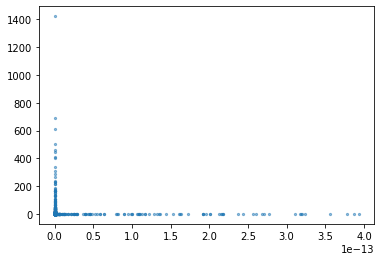

-0.9999998211194273 0.0


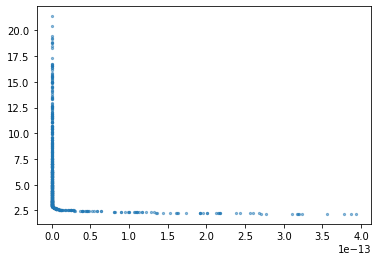

0.2
1291
-0.999999930287155 0.0


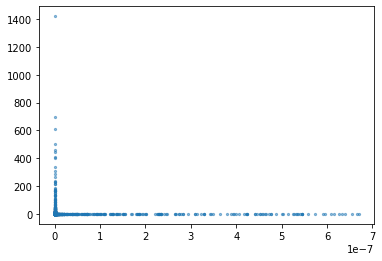

-0.999999930287155 0.0


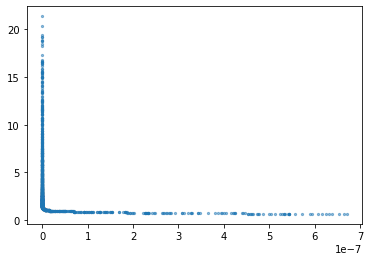

0.30000000000000004
1937
-0.9999999599590613 0.0


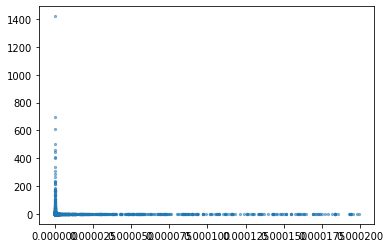

-0.9999999599590613 0.0


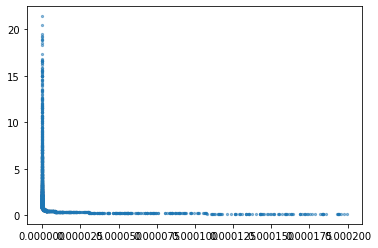

0.4
2583
-0.9999999691878946 0.0


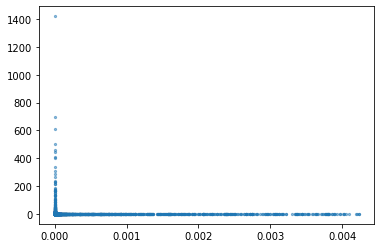

-0.9999999691878946 0.0


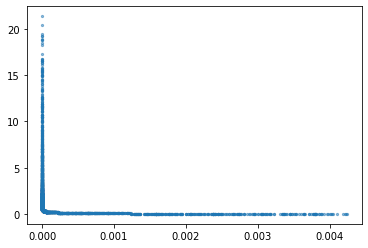

0.5
3229
-0.999999974158652 0.0


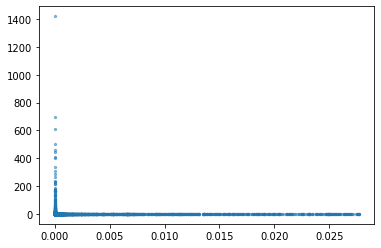

-0.999999974158652 0.0


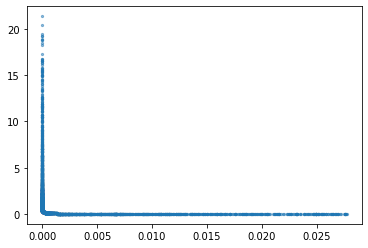

0.6000000000000001
3874
-0.999999977038384 0.0


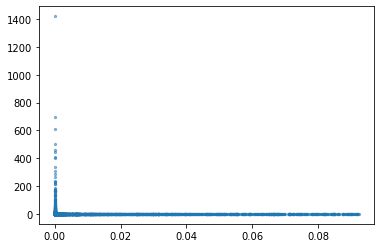

-0.999999977038384 0.0


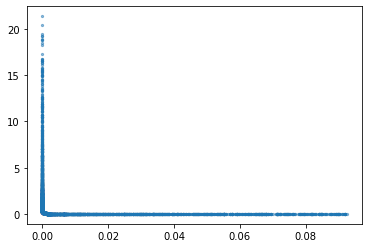

0.7000000000000001
4520
-0.999999980150609 0.0


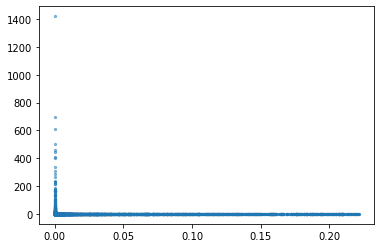

-0.999999980150609 0.0


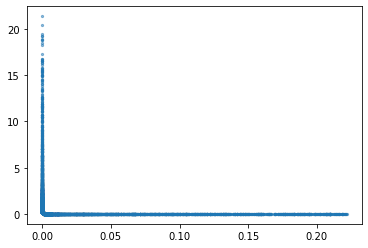

0.8
5166
-0.9999999815040348 0.0


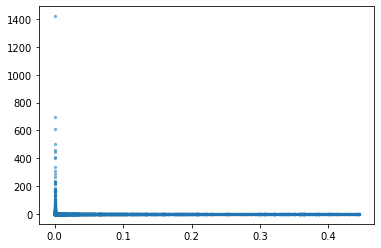

-0.9999999815040348 0.0


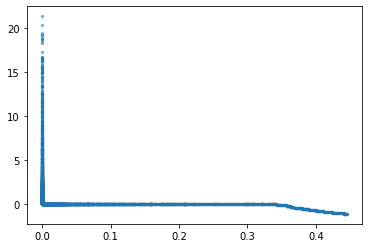

0.9
5812
-0.9999999832217448 0.0


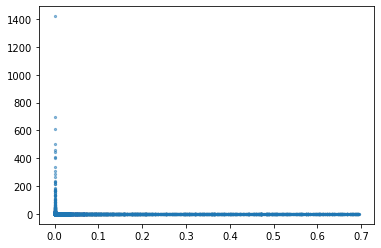

-0.9999999832217448 0.0


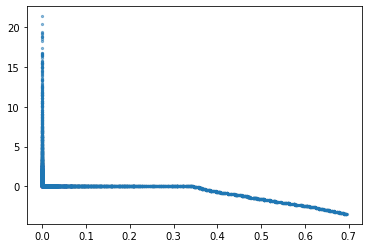

1.0
6458
-0.9999999846845471 0.0


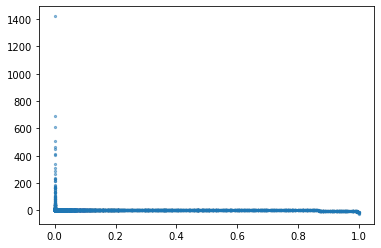

-0.9999999846845471 0.0


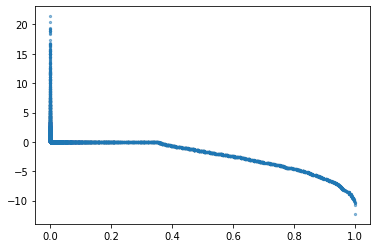

In [6]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    print(int(len(DESeq_id) * percentage[count]))
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    '''
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    '''
    rho, pval = stats.spearmanr(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],GPcounts_NB_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])])
    print(rho,pval)
    corr_NB.append(rho)
    plt.scatter(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])] ,GPcounts_NB_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],GPcounts_G_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])])
    print(rho,pval)
    corr_G.append(rho)
    plt.scatter(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])] ,GPcounts_G_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],s=5,alpha=0.5)
    plt.show() 
    '''
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
    '''

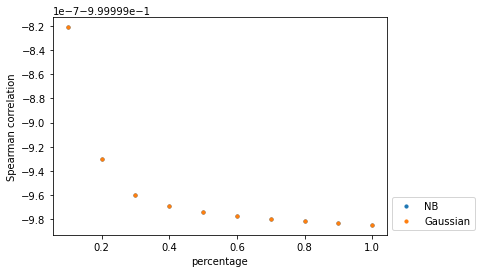

In [7]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

sort GPcounts results according to DESeq2 

In [8]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.029803,-1499.209431,1420.179628
SPAC19D5.01,-114.097918,-725.458350,611.360432
SPBC365.12c,-163.035588,-164.569365,1.533777
SPCPB16A4.07,-133.031233,-536.215337,403.184104
SPBC21C3.19,-146.014217,-557.805996,411.791780
...,...,...,...
SPBC1271.13,-101.967087,-101.956860,-0.010227
SPAC343.18,-89.823496,-89.945202,0.121706
SPCC777.15,-86.473866,-86.473072,-0.000794
SPBC28F2.05c,-98.954941,-98.954655,-0.000286


In [9]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-21.897779,-41.154533,1.925675e+01
SPAC19D5.01,-15.597537,-36.979781,2.138224e+01
SPBC365.12c,-11.518583,-31.909273,2.039069e+01
SPCPB16A4.07,-20.725368,-39.632772,1.890740e+01
SPBC21C3.19,-16.442299,-35.640826,1.919853e+01
...,...,...,...
SPBC1271.13,2.696964,2.697020,-5.529963e-05
SPAC343.18,3.972107,3.972254,-1.462619e-04
SPCC777.15,-9.273692,-9.273662,-3.038987e-05
SPBC28F2.05c,-10.853131,-10.853130,-7.402473e-07


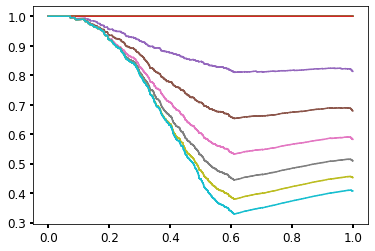

In [10]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()

dfs = [GPcounts_G_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['padj'][j] <= .005 :
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])

        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        plt.tick_params(labelsize='large', width=2) 
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        #plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        
    plt.show()


3229
0.0138557735775081
[1.99932263 0.99932263 0.01389629 0.        ]
4


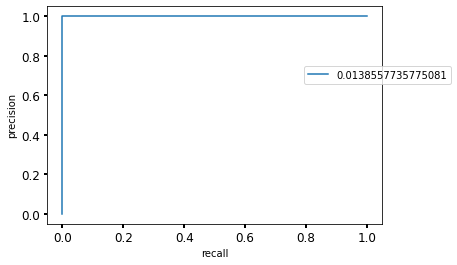

In [11]:
half_of_the_data =int(len(DESeq_id) * .5)
print(half_of_the_data)
print(DESeq_sorted['pvalue'][half_of_the_data-1])
true_label = np.zeros(len(DESeq_sorted))

for j in range(len(DESeq_sorted)):
    if DESeq_sorted['padj'][j] <= DESeq_sorted['padj'][half_of_the_data-1]:
        true_label[j] = 1
labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])

precision, recall,threshold = metrics.roc_curve(labels['label'],DESeq_sorted['pvalue'])
print(threshold)
print(len(threshold))
plt.plot( recall,precision,label=DESeq_sorted['pvalue'][half_of_the_data-1])
plt.tick_params(labelsize='large', width=2) 

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='best', bbox_to_anchor=(1.22, .75))


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
index 644
padj 3.93640489832399e-13
at 0.1
{0.0: 5813, 1.0: 645}
index 1290
padj 6.70368621640978e-07
at 0.2
{0.0: 5167, 1.0: 1291}
index 1936
padj 0.000199262309988723
at 0.3
{0.0: 4521, 1.0: 1937}
index 2582
padj 0.00423617511191469
at 0.4
{0.0: 3875, 1.0: 2583}
index 3228
padj 0.0277115471550162
at 0.5
{0.0: 3229, 1.0: 3229}
index 3873
padj 0.0924076119214304
at 0.6
{0.0: 2584, 1.0: 3874}
index 4519
padj 0.22154984451550502
at 0.7
{0.0: 1936, 1.0: 4522}
index 5165
padj 0.44474430019374495
at 0.8
{0.0: 1290, 1.0: 5168}
index 5811
padj 0.694927351358826
at 0.9
{0.0: 646, 1.0: 5812}


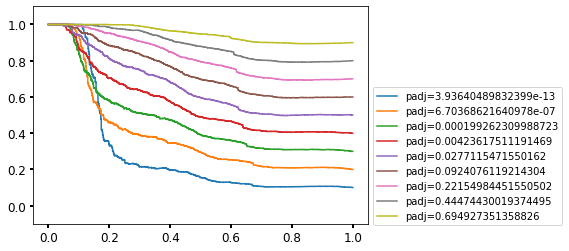

index 644
padj 3.93640489832399e-13
at 0.1
{0.0: 5813, 1.0: 645}
index 1290
padj 6.70368621640978e-07
at 0.2
{0.0: 5167, 1.0: 1291}
index 1936
padj 0.000199262309988723
at 0.3
{0.0: 4521, 1.0: 1937}
index 2582
padj 0.00423617511191469
at 0.4
{0.0: 3875, 1.0: 2583}
index 3228
padj 0.0277115471550162
at 0.5
{0.0: 3229, 1.0: 3229}
index 3873
padj 0.0924076119214304
at 0.6
{0.0: 2584, 1.0: 3874}
index 4519
padj 0.22154984451550502
at 0.7
{0.0: 1936, 1.0: 4522}
index 5165
padj 0.44474430019374495
at 0.8
{0.0: 1290, 1.0: 5168}
index 5811
padj 0.694927351358826
at 0.9
{0.0: 646, 1.0: 5812}


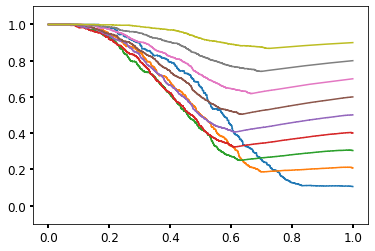

In [12]:
#percentage = np.array(list(range(.1,10)))
percentage = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
#[.0001,.001,.005,.01,.05,.1,.5,1.]
print(percentage)
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(9):
        true_label = np.zeros(D)
        pval_index =int(len(DESeq_sorted['padj']) * percentage[i])-1
        print('index',pval_index)
        print('padj',DESeq_sorted['padj'][pval_index])
        print('at',percentage[i])

        for j in range(D):
            if DESeq_sorted['padj'][j] <= DESeq_sorted['padj'][pval_index]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])
        #print(precision, recall, thresholds )
        plt.plot( recall,precision,label='padj='+str(DESeq_sorted['padj'][pval_index]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()


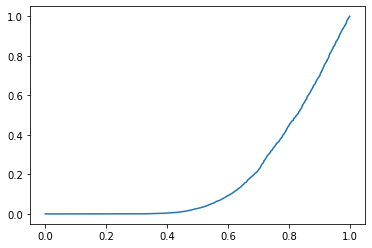

In [13]:
xtest = np.linspace(np.min(DESeq_sorted['padj']),np.max(DESeq_sorted['padj']),len(DESeq_sorted['padj']))[:,None]
plt.plot(xtest,DESeq_sorted['padj'])

645
3.93640489832399e-13
{1.0: 645}
1291
6.70368621640978e-07
{1.0: 1291}
1937
0.000199262309988723
{1.0: 1937}
2583
0.00423617511191469
{1.0: 2583}
3229
0.0277115471550162
{0.0: 604, 1.0: 2625}
3874
0.0924076119214304
{0.0: 1249, 1.0: 2625}
4520
0.22154984451550502
{0.0: 1895, 1.0: 2625}
5166
0.44474430019374495
{0.0: 2541, 1.0: 2625}
5812
0.694927351358826
{0.0: 3187, 1.0: 2625}
6458
0.999322629209356
{0.0: 3833, 1.0: 2625}


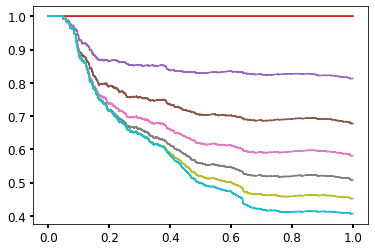

In [14]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['padj'][j] <= .005:
                true_label[j] = 1
        unique, counts = np.unique(true_label, return_counts=True)
        print(D)
        print(DESeq_sorted['padj'][D-1])
        print(dict(zip(unique, counts)))
        
        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])
        plt.tick_params(labelsize='large', width=2) 
        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        #plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with ZINB likelihood'
        elif df == 1:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title)
        '''
    plt.show()


In [15]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10

dfs = [GPcounts_NB_sorted['log_likelihood_ratio']]#,GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_sorted) * percentage[i])
        print('D',D)
        print(len(list(set(DESeq_sorted.index.values[0:D]).intersection(set(GPcounts_NB_sorted.index.values[0:D])))))
        

D 645
162
D 1291
475
D 1937
856
D 2583
1271
D 3229
1839
D 3874
2442
D 4520
3188
D 5166
4094
D 5812
5200
D 6458
6458


<Figure size 432x288 with 0 Axes>